### Exploring the quantum random walk search algorithm

**Random walks** are one of the most powerful tools used in science and modeling-- they emerge in fields as wide ranging as psychology, physics, biology, and economics. The general case of random walks, Markov chains, are extensively used in machine learning and Bayersian statistics. In short, random walks are a powerful backbone for many further algorithms. Quantum random walks can offer a powerful algorithmic tool that outperform their classical analogues, one example being Google's well known [PageRank algorithm](https://arxiv.org/pdf/1511.04823.pdf).

We can think of random walks as describing the path of a particle as it moves in space. The particle randomly moves to positions in space as the model steps through time. We will consider a [quantum walk on n-dimensional hypercubes](https://arxiv.org/pdf/quant-ph/0210064v1.pdf) (namely the Cayley graph the group $\mathbb{Z}_{2}^{n}$). 

As an example, consider a square with the four vertices labeled in binary. We start at 00. To simulate a random walk, we can flip a coin: if it is 'heads' (i.e. state 1), we perform the operation $\vec{x} \oplus 01$ (i.e. $00 \oplus 01$ if we start with $\vec{x}=00$); if it is tails we perform the operation $\vec{x} \oplus 10$. Play the video below to see the evolution of the random walk.

<video width="520" height="240" controls src="square.mp4" />

For each step of this discrete random walk, we perform an operation (randomly either $\vec{x} \oplus 01$ or $\vec{x} \oplus 10$) and thus move to a new state. For the quantum random walk, we define a unitary evolution operator $U$ that acts on a Hilbert space to evolve the system. The operator consists two operators:
1. A controlled shift operation (permutation matrix),

2. An operation that 'flips' the (quantum) coin (this can be as simple as a Hadamard gate on each qubit; we use the Grover diffusion operator),

with $U=S \cdot C$.

The Hilbert space is described by a 'quantum coin space' and a 'direction' space for the nodes on the graph, $\mathcal{H}^{C} \otimes \mathcal{H}^{S}$. Each of the $N=2^{n}$ nodes on the graph is labeled with a binary string, so the node space is $\mathcal{H}^{2^{n}}$, and the total Hilbert space (including the coin) is $\mathcal{H}=\mathcal{H}^{n} \otimes \mathcal{H}^{2^{n}}$.

We can explicitly write out the operations for the shift matrix and the coin operator,

1. The shift operator: $S=\sum_{d=0}^{n-1} \sum_{\vec{x}}|d, \vec{x} \oplus \overrightarrow{e_{d}}\rangle\langle d, \vec{x}|$

2. The coin operator: $C=G \otimes \mathcal{I}-(G-\mathcal{I}) \otimes|\overrightarrow{0}\rangle\langle\overrightarrow{0}|$, where G is Grover's diffusion operator, and where we have marked $|\overrightarrow{0}\rangle$ as the target state of our oracle which performs the random walk. 

We use Qiskit to write out these operators, and the circuit, explicitly (defined in the file QRW_Automata.py and the jupyter notebook quantum_notebook.ipynb). 

In [2]:
from QRW_Automata import QRWsearch
search_circuit = QRWsearch(2,0)
search_circuit.S(display_matrix=True)
search_circuit.C(display_matrix=True)

Matrix for the shift operator:
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]
Matrix for the quantum coin operator:
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

     ┌───┐┌─────┐┌─────┐┌─────┐┌─┐      
q_0: ┤ H ├┤0    ├┤0    ├┤0    ├┤M├──────
     ├───┤│     ││     ││     │└╥┘┌─┐   
q_1: ┤ H ├┤1 U' ├┤1 U' ├┤1 U' ├─╫─┤M├───
     ├───┤│     ││     ││     │ ║ └╥┘┌─┐
q_2: ┤ H ├┤2    ├┤2    ├┤2    ├─╫──╫─┤M├
     └───┘└─────┘└─────┘└─────┘ ║  ║ └╥┘
c_0: ═══════════════════════════╩══╬══╬═
                                   ║  ║ 
c_1: ══════════════════════════════╩══╬═
                                      ║ 
c_2: ═════════════════════════════════╩═
                                        


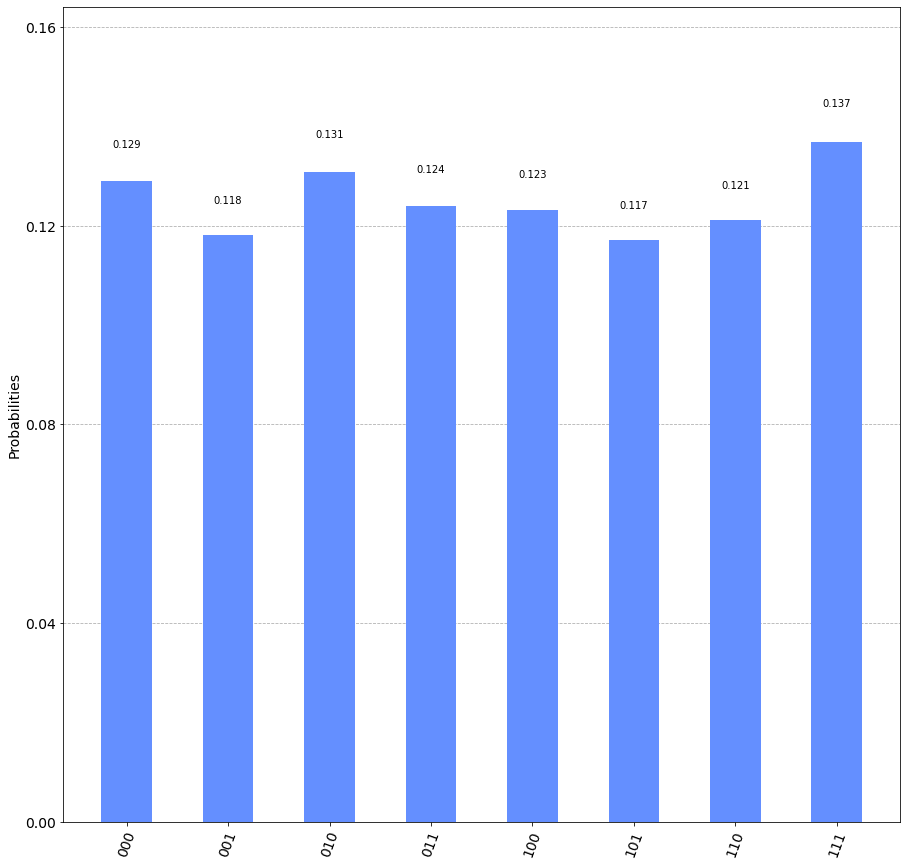

In [2]:
from QRW_Automata import QRWsearch
search_circuit = QRWsearch(2,0)
print(search_circuit.draw_circuit())
search_circuit.plot_states_hist()